In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.width", 500)
pd.set_option("display.float_format", lambda x: "%.4f"%x)

import warnings
warnings.filterwarnings("ignore")

# Import Dataset

In [ ]:
diabetes = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/diabetes.csv")
df = diabetes.copy()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6000,0.6270,50,1
1,1,85,66,29,0,26.6000,0.3510,31,0
2,8,183,64,0,0,23.3000,0.6720,32,1
3,1,89,66,23,94,28.1000,0.1670,21,0
4,0,137,40,35,168,43.1000,2.2880,33,1


In [ ]:
def check_df(dataframe, head=5):
  print(20 * "*", "HEAD", 20 * "*")
  print(dataframe.head(head))
  print(20 * "*", "TAIL", 20 * "*")
  print(dataframe.tail(head))
  print(20 * "*", "SHAPE", 20 * "*")
  print(dataframe.shape)
  print(20 * "*", "TYPE", 20 * "*")
  print(dataframe.dtypes)
  print(20 * "*", "NA", 20 * "*")
  print(dataframe.isnull().sum())
  print(20 * "*", "QUARTILES", 20 * "*")
  print(dataframe.describe([0, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99, 1]).T)

In [ ]:
check_df(df)

******************** HEAD ********************
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35        0 33.6000                    0.6270   50        1
1            1       85             66             29        0 26.6000                    0.3510   31        0
2            8      183             64              0        0 23.3000                    0.6720   32        1
3            1       89             66             23       94 28.1000                    0.1670   21        0
4            0      137             40             35      168 43.1000                    2.2880   33        1
******************** TAIL ********************
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI  DiabetesPedigreeFunction  Age  Outcome
763           10      101             76             48      180 32.9000                    0.1710   63        0
764           

# Analysis of Categorical and Numerical Variables

In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object", "bool"]]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes in ["uint8", "int64", "float64"]]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and str(dataframe[col].dtypes) in ["category", "object"]]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["uint8", "int64", "float64"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    return cat_cols, num_cols, cat_but_car, num_but_cat

In [ ]:
cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)
print(f"Observation: {df.shape[0]}")
print(f"Variables: {df.shape[1]}")
print(f"Cat_Cols: {len(cat_cols)}")
print(f"Num_Cols: {len(num_cols)}")
print(f"Cat_But_Car: {len(cat_but_car)}")
print(f"Num_But_cat: {len(num_but_cat)}")

Observation: 768
Variables: 9
Cat_Cols: 1
Num_Cols: 8
Cat_But_Car: 0
Num_But_cat: 1


In [ ]:
def num_summary(dataframe, num_col, plot=False):
    print(f"####################### {num_col} #######################")
    quantiles = [0.01, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[num_col].describe(quantiles).T)

    if plot:
        dataframe[num_col].hist(bins=20)
        plt.xlabel(num_col)
        plt.title(num_col)
        plt.show(block=True)

In [ ]:
def num_summary_df(dataframe):
    cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)
    for col in num_cols:
        num_summary(dataframe, col, plot=True)

####################### Pregnancies #######################
count   768.0000
mean      3.8451
std       3.3696
min       0.0000
1%        0.0000
5%        0.0000
10%       0.0000
20%       1.0000
30%       1.0000
40%       2.0000
50%       3.0000
60%       4.0000
70%       5.0000
80%       7.0000
90%       9.0000
95%      10.0000
99%      13.0000
max      17.0000
Name: Pregnancies, dtype: float64


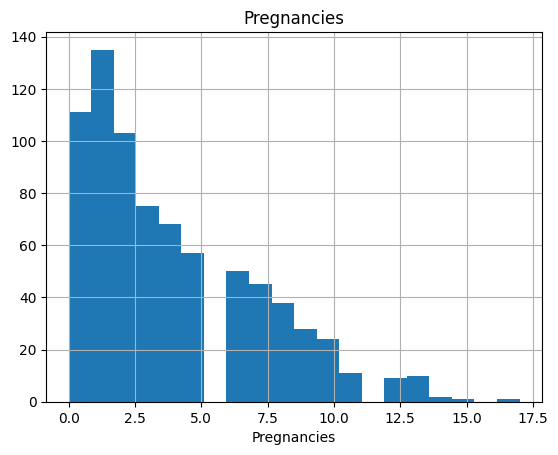

####################### Glucose #######################
count   768.0000
mean    120.8945
std      31.9726
min       0.0000
1%       57.0000
5%       79.0000
10%      85.0000
20%      95.0000
30%     102.0000
40%     109.0000
50%     117.0000
60%     125.0000
70%     134.0000
80%     147.0000
90%     167.0000
95%     181.0000
99%     196.0000
max     199.0000
Name: Glucose, dtype: float64


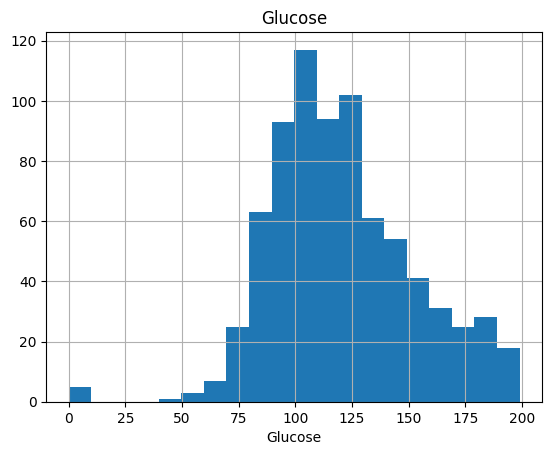

####################### BloodPressure #######################
count   768.0000
mean     69.1055
std      19.3558
min       0.0000
1%        0.0000
5%       38.7000
10%      54.0000
20%      60.0000
30%      64.0000
40%      68.0000
50%      72.0000
60%      74.0000
70%      78.0000
80%      82.0000
90%      88.0000
95%      90.0000
99%     106.0000
max     122.0000
Name: BloodPressure, dtype: float64


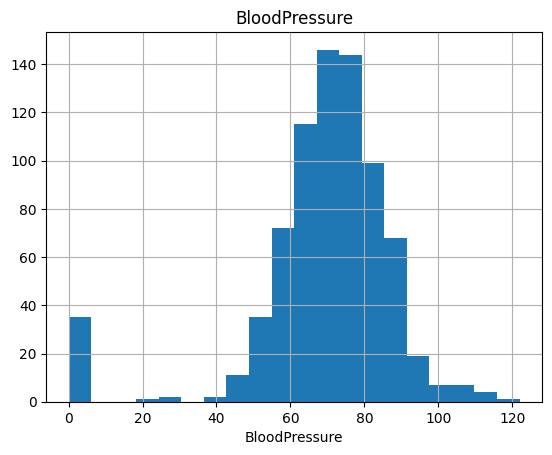

####################### SkinThickness #######################
count   768.0000
mean     20.5365
std      15.9522
min       0.0000
1%        0.0000
5%        0.0000
10%       0.0000
20%       0.0000
30%       8.2000
40%      18.0000
50%      23.0000
60%      27.0000
70%      31.0000
80%      35.0000
90%      40.0000
95%      44.0000
99%      51.3300
max      99.0000
Name: SkinThickness, dtype: float64


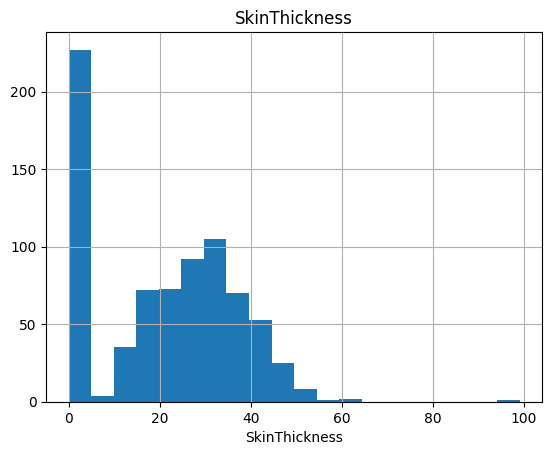

####################### Insulin #######################
count   768.0000
mean     79.7995
std     115.2440
min       0.0000
1%        0.0000
5%        0.0000
10%       0.0000
20%       0.0000
30%       0.0000
40%       0.0000
50%      30.5000
60%      72.2000
70%     106.0000
80%     150.0000
90%     210.0000
95%     293.0000
99%     519.9000
max     846.0000
Name: Insulin, dtype: float64


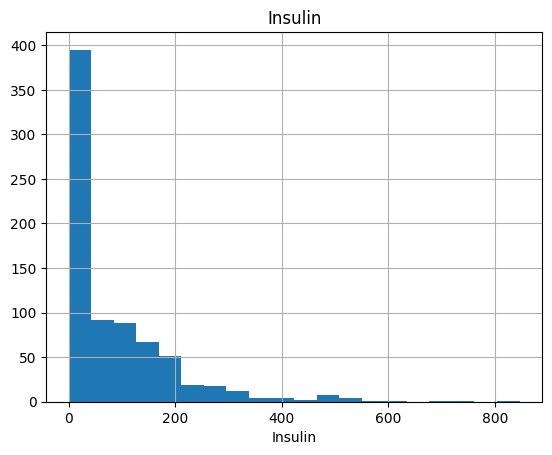

####################### BMI #######################
count   768.0000
mean     31.9926
std       7.8842
min       0.0000
1%        0.0000
5%       21.8000
10%      23.6000
20%      25.9000
30%      28.2000
40%      30.1000
50%      32.0000
60%      33.7000
70%      35.4900
80%      37.8000
90%      41.5000
95%      44.3950
99%      50.7590
max      67.1000
Name: BMI, dtype: float64


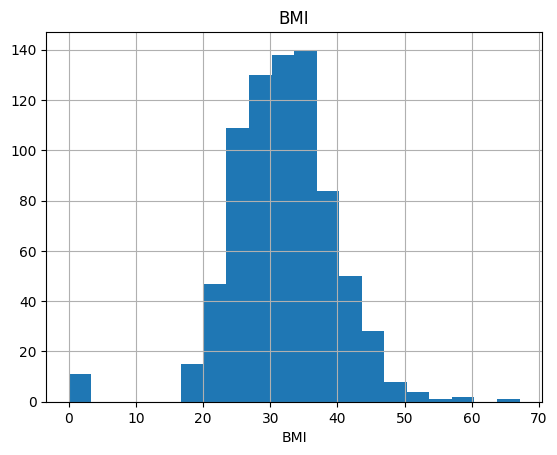

####################### DiabetesPedigreeFunction #######################
count   768.0000
mean      0.4719
std       0.3313
min       0.0780
1%        0.0947
5%        0.1404
10%       0.1650
20%       0.2194
30%       0.2590
40%       0.3028
50%       0.3725
60%       0.4542
70%       0.5637
80%       0.6870
90%       0.8786
95%       1.1328
99%       1.6983
max       2.4200
Name: DiabetesPedigreeFunction, dtype: float64


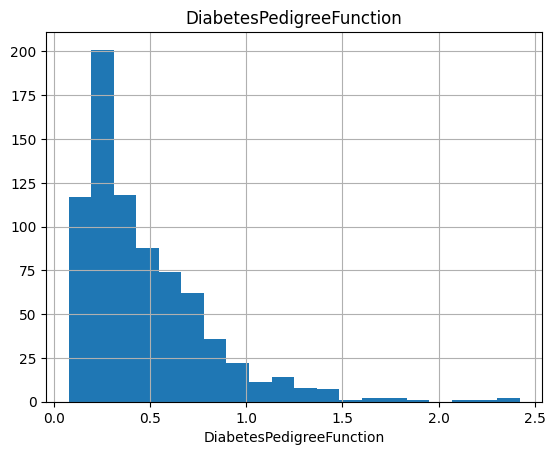

####################### Age #######################
count   768.0000
mean     33.2409
std      11.7602
min      21.0000
1%       21.0000
5%       21.0000
10%      22.0000
20%      23.0000
30%      25.0000
40%      27.0000
50%      29.0000
60%      33.0000
70%      38.0000
80%      42.6000
90%      51.0000
95%      58.0000
99%      67.0000
max      81.0000
Name: Age, dtype: float64


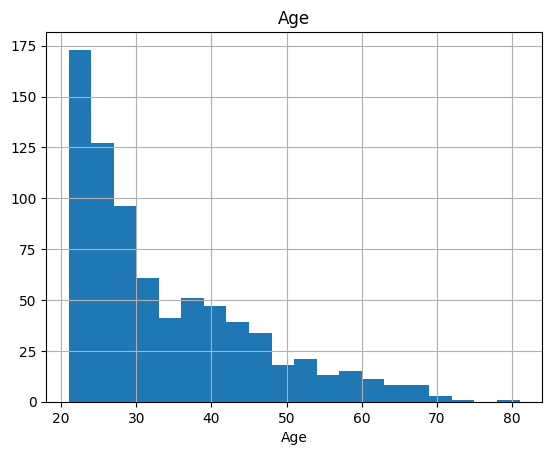

In [ ]:
num_summary_df(df)

In [ ]:
def plot_num_summary(dataframe):
  cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(dataframe)
  plt.figure(figsize=(12, 4))
  for index, col in enumerate(num_cols):
    plt.subplot(2,4, index+1)
    plt.tight_layout()
    dataframe[col].hist(bins=20)
    plt.title(col)

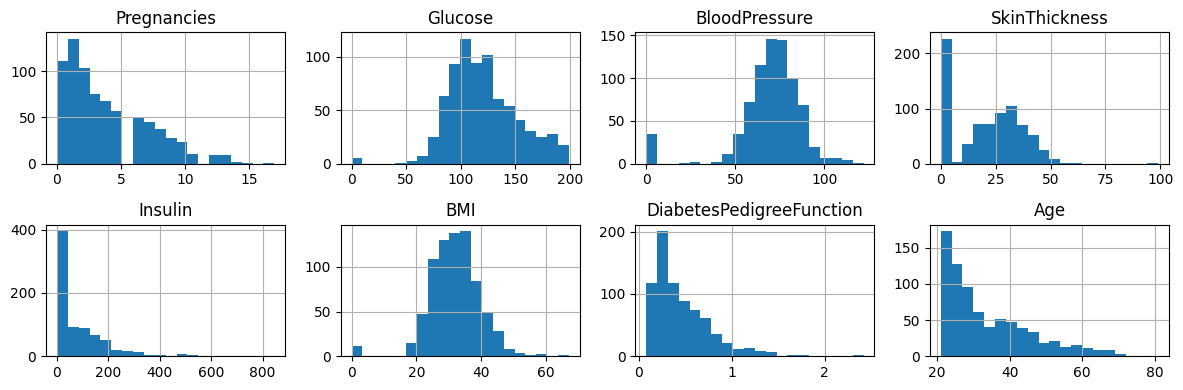

In [ ]:
plot_num_summary(df)

In [ ]:
def cat_summary(dataframe, col_name, plot= False):
  print(50 * "*", f"{col_name}", 50 * "*")
  print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                      'Ratio': 100 * dataframe[col_name].value_counts() / len(dataframe)}))
  if plot == True:
    sns.countplot(x=dataframe[col_name], data = dataframe)
    plt.show(block=True)

In [ ]:
def cat_summary_df(dataframe):
  cat_cols, num_cols, cat_but_car, nun_but_cat = grab_col_names(df)
  for col in cat_cols:
    if dataframe[col].dtypes == "bool":
      new_df = pd.DataFrame()
      new_df[col] = dataframe[col].astype(int)
      cat_summary(dataframe, col, plot=True)
    else:
      cat_summary(dataframe, col, plot=True)



************************************************** Outcome **************************************************
   Outcome   Ratio
0      500 65.1042
1      268 34.8958


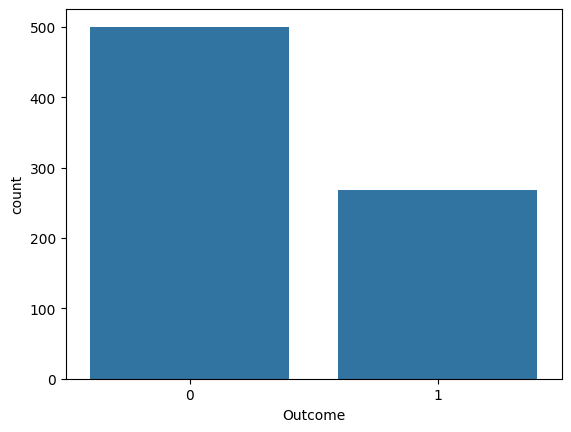

In [ ]:
cat_summary_df(df)

In [ ]:
def target_summary_num(dataframe, target, numerical_col):
  print(15 * "#", f"{target} -> {numerical_col}", 15 * "#")
  print(pd.DataFrame({"Target Mean": dataframe.groupby(target)[numerical_col].mean()}))

In [ ]:
def target_summary_num_df(dataframe, target):
    cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(dataframe)
    for col in num_cols:
        target_summary_num(dataframe, target, col)

In [ ]:
target_summary_num_df(df, "Outcome")

############### Outcome -> Pregnancies ###############
         Target Mean
Outcome             
0             3.2980
1             4.8657
############### Outcome -> Glucose ###############
         Target Mean
Outcome             
0           109.9800
1           141.2575
############### Outcome -> BloodPressure ###############
         Target Mean
Outcome             
0            68.1840
1            70.8246
############### Outcome -> SkinThickness ###############
         Target Mean
Outcome             
0            19.6640
1            22.1642
############### Outcome -> Insulin ###############
         Target Mean
Outcome             
0            68.7920
1           100.3358
############### Outcome -> BMI ###############
         Target Mean
Outcome             
0            30.3042
1            35.1425
############### Outcome -> DiabetesPedigreeFunction ###############
         Target Mean
Outcome             
0             0.4297
1             0.5505
############### Outcome ->

# Correlation Analysis

In [ ]:
def correlated_cols(dataframe, plot=False):
  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["uint8", "int64", "float64"]]
  corr = dataframe[num_cols].corr()
  if plot:
    sns.set(rc={"figure.figsize" : (18, 23)})
    sns.heatmap(corr, cmap = "magma", annot = True, fmt = ".2f")
    plt.show()

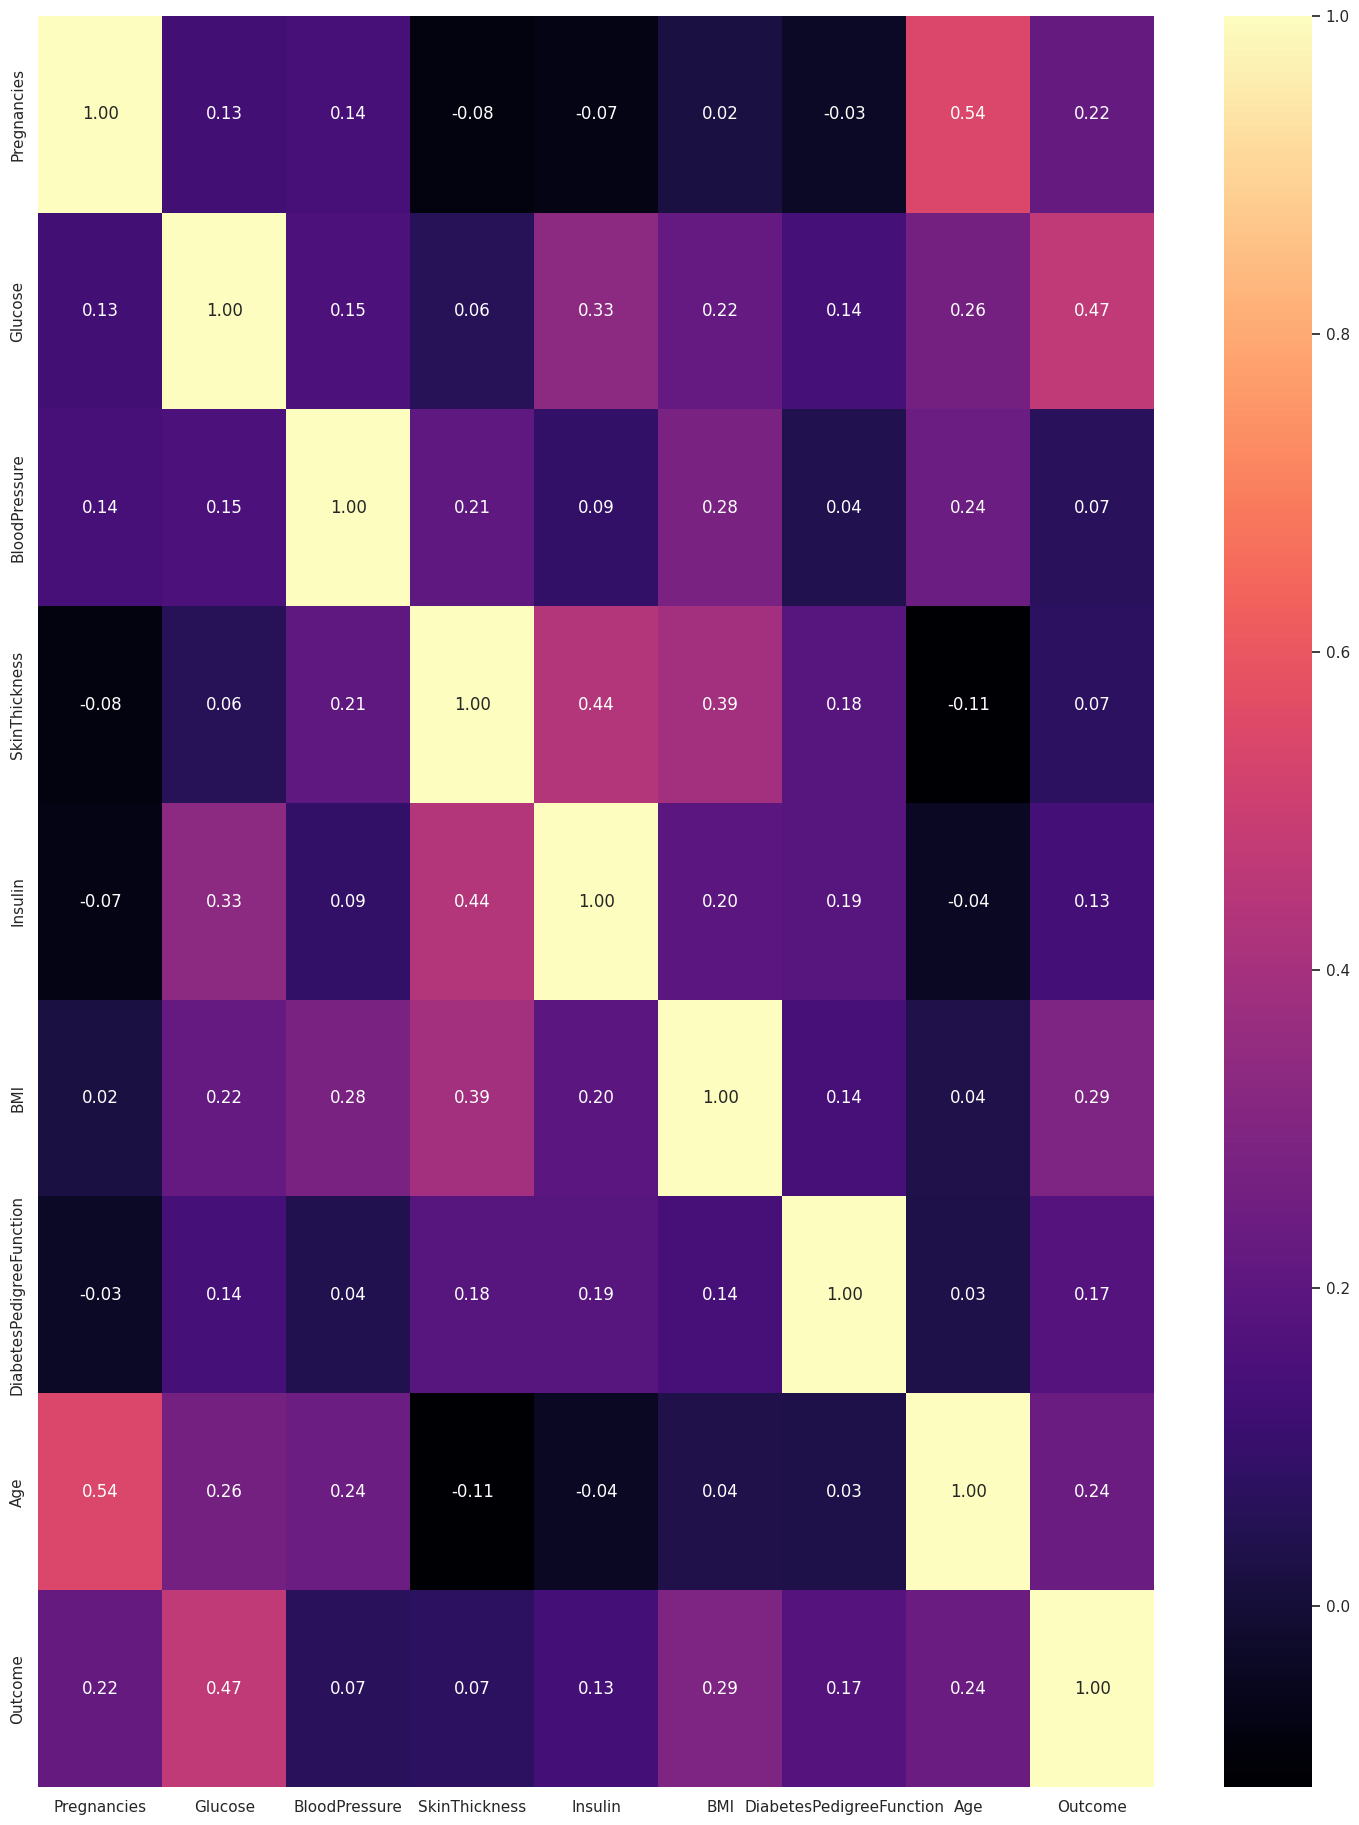

In [ ]:
correlated_cols(df, plot = True)

In [ ]:
def high_correlated_cols(dataframe, corr_th = 0.90, plot=False):
  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["uint8", "int64", "float64"]]
  corr = df[num_cols].corr()
  corr_matrix = corr.abs()
  upper_triangular_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
  drop_list = [col for col in upper_triangular_matrix.columns if any(upper_triangular_matrix[col] > corr_th)]
  if drop_list == []:
    print("After correlation analysis, we do not need to remove variables.")
  if plot:
    sns.set(rc={"figure.figsize" : (18, 13)})
    sns.heatmap(corr, cmap = "RdBu", annot = True, fmt = ".2f")
    plt.show()

  return drop_list


After correlation analysis, we do not need to remove variables.


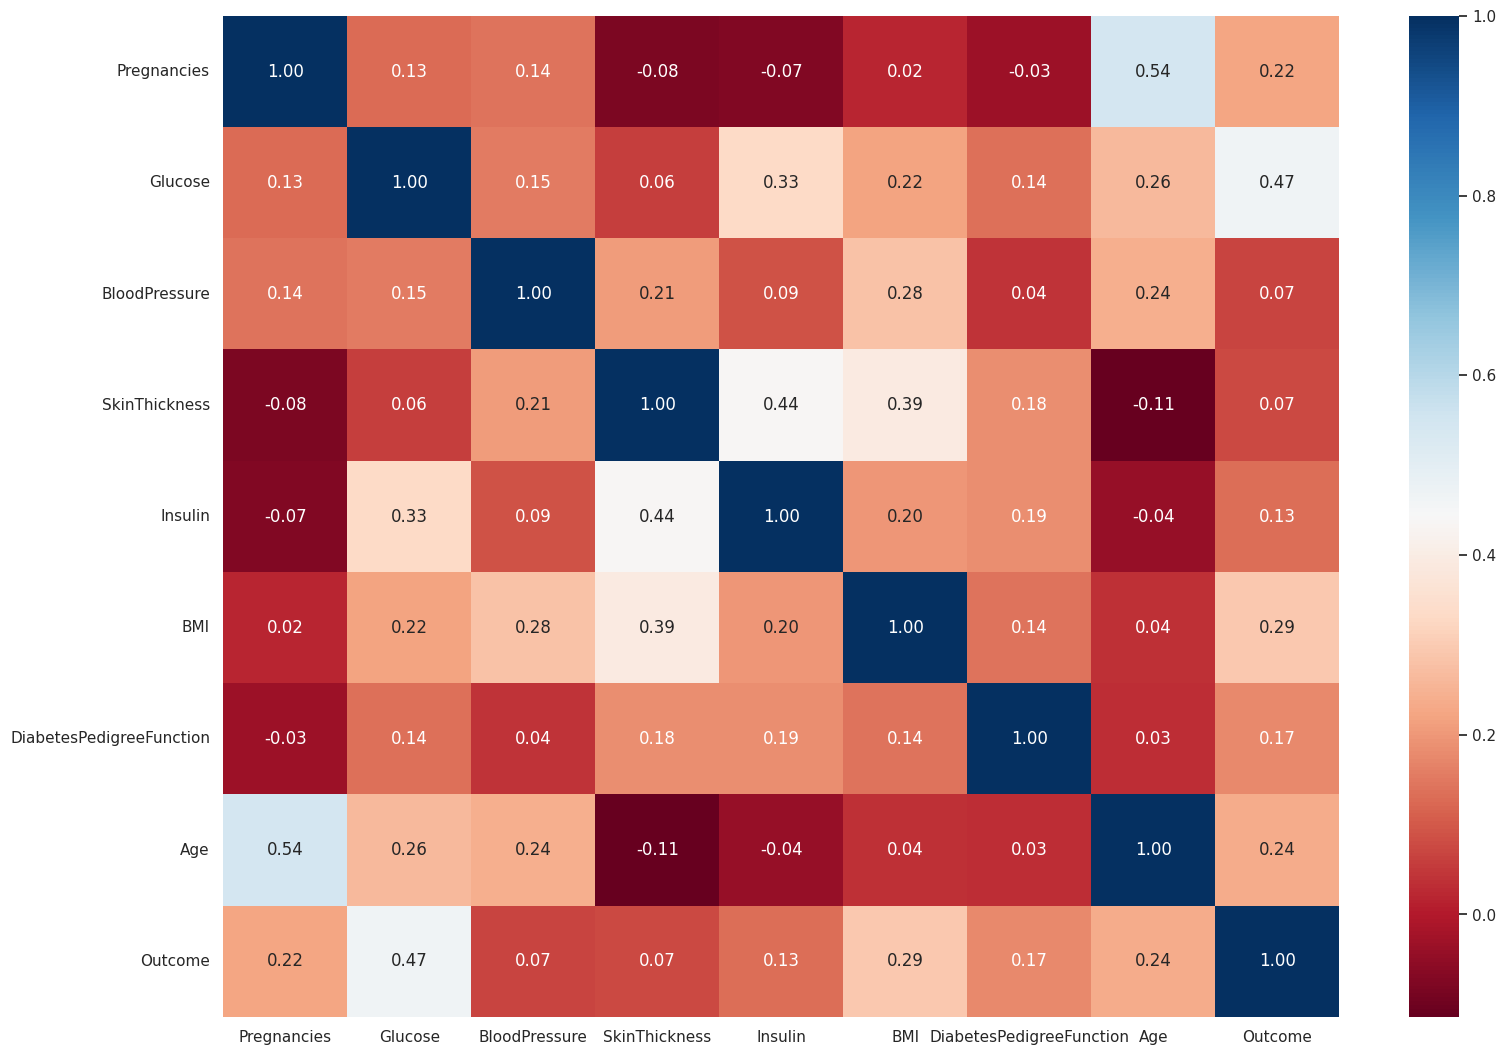

[]

In [ ]:
high_correlated_cols(df, plot=True)

# Create a Base Model (Machine Learning Model)

In [ ]:
target = df["Outcome"]
input = df.drop("Outcome", axis=1)

In [ ]:
target.shape

(768,)

In [ ]:
input.shape

(768, 8)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(input, target, test_size=0.3, random_state=1)

In [ ]:
x_train.shape

(537, 8)

In [ ]:
x_test.shape

(231, 8)

In [ ]:
rf_model = RandomForestClassifier(random_state = 1).fit(x_train, y_train)

In [ ]:
rf_model

RandomForestClassifier(random_state=1)

In [ ]:
y_pred = rf_model.predict(x_test)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")

Accuracy: 0.79


In [ ]:
def RF_Model(dataframe, target, test_size = 0.30, save=False, csv=False):
  y = dataframe[target]
  X = dataframe.drop(target, axis=1)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=17)
  rf_model = RandomForestClassifier(random_state=17).fit(X_train, y_train)
  y_pred = rf_model.predict(X_test)
  print(f"Accuracy:{round(accuracy_score(y_pred, y_test), 2)}")

  feature_imp = pd.DataFrame({"Value": rf_model.feature_importances_, "Feature": X.columns})
  plt.figure(figsize=(8,8))
  sns.set(font_scale=1)
  sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
  plt.title("Features")
  plt.tight_layout()
  if save:
    plt.savefig("important_features.jpg")
  if csv:
    output = pd.DataFrame(y_pred)
    output.to_csv("output.csv")
  return y_pred

Accuracy:0.79


array([0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

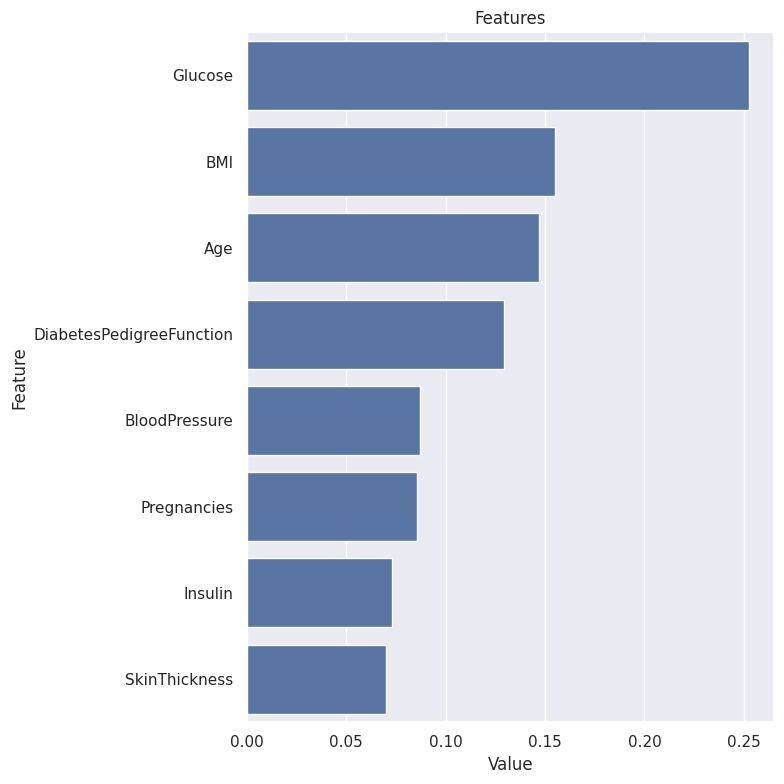

In [ ]:
RF_Model(df, "Outcome", save=True, csv=True)